# Data Presentation

Run this notebook to make Figure 1.

The figures are outputted in the `./figures` folder

In [3]:
#!/usr/bin/env python
# coding: utf-8
# (c) Charles Le Losq, Clément Ferraina 2023
# see embedded licence file
# iVisc 1.0

#
# Library Loading
#
import pandas as pd # manipulate dataframes
import matplotlib.pyplot as plt # plotting
import numpy as np


/tmp/ipykernel_253993/2597956787.py:10: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # manipulate dataframes


# Create Figure 1

[2625, 901, 2088, 1081, 1083, 598, 1390, 994, 1525, 1853, 439, 419]
[200, 105, 188, 125, 119, 62, 153, 157, 175, 132, 34, 119]


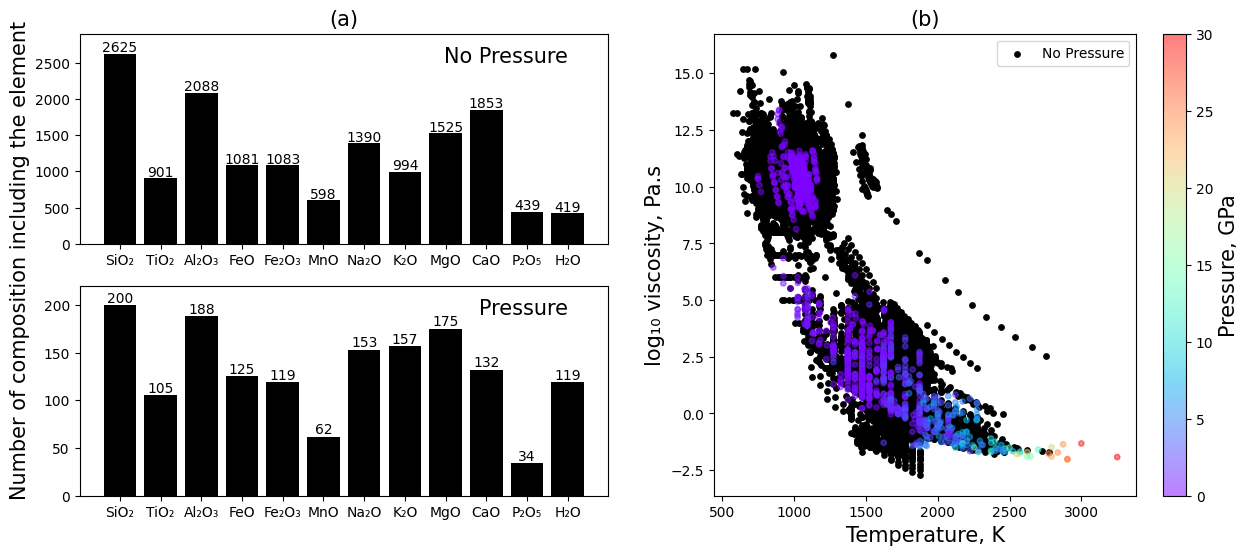

In [2]:
# loading the spreadsheets 
dataset_lp = pd.read_excel("./data/database.xlsx", sheet_name="lp")
dataset_hp = pd.read_excel("./data/database.xlsx", sheet_name="hp")

# Read database already differenciated by unique compositions
compolp = pd.read_excel('./data/database.xlsx',sheet_name='uniquelp')
compohp = pd.read_excel('./data/database.xlsx',sheet_name='uniquehp')

# Create empty dataframe with column names
lplist=[]
hplist=[]

# create a Boolean mask for the rows to hide
for i in ('s','t','a','f','f.1','m','n','k','m.1','c','p','h'):    #Looking for all elements
    masklp = compolp[i] == 0    #Create a mask to hide all non 100% data
    maskhp = compohp[i] == 0    #Create a mask to hide all non 100% data
    i_onlylp = compolp[~masklp]    #Looking for all elements    
    i_onlyhp = compohp[~maskhp]    #Looking for all elements
    lplist.append(i_onlylp.shape[0])    #Add to dataframe the system 
    hplist.append(i_onlyhp.shape[0])    #Add to dataframe the system 

print(lplist)
print(hplist)

# Create function to add values to barplots
def add_value_label(x_list, y_list):
    for i in range(1, len(x_list) + 1):
        plt.text(i, y_list[i - 1]+30, y_list[i - 1], ha='center')
def add_value_label2(x_list, y_list):
    for i in range(1, len(x_list) + 1):
        plt.text(i, y_list[i - 1]+3, y_list[i - 1], ha='center')
class_number = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] #['sio2','tio2','al2o3','feo','mno','na2o','k2o','mgo','cao','p2o5','h2o'])

# Create figures
fig=plt.figure(figsize=(15,6))

# Barplot 1 database without P
ax1=plt.subplot(2,2,1)
ax1.bar(class_number, lplist,color='black')
add_value_label(class_number, lplist)
ax1.set_xticks(class_number, ['SiO\u2082','TiO\u2082','Al\u2082O\u2083','FeO','Fe\u2082O\u2083','MnO','Na\u2082O','K\u2082O','MgO','CaO','P\u2082O\u2085','H\u2082O'])
ax1.set_ylim(0,2900)
ax1.text(12,2500,'No Pressure',size=15,ha='right')
ax1.set_title('(a)',size=15)

# Barplot 2 database with P
ax2=plt.subplot(2,2,3)
ax2.bar(class_number, hplist, color='black')
add_value_label2(class_number, hplist)
ax2.set_xticks(class_number, ['SiO\u2082','TiO\u2082','Al\u2082O\u2083','FeO','Fe\u2082O\u2083','MnO','Na\u2082O','K\u2082O','MgO','CaO','P\u2082O\u2085','H\u2082O'])
ax2.set_ylim(0,220)
ax2.text(12,190,'Pressure',size=15,ha='right')
ax2.text(-1.7,0,'Number of composition including the element',rotation='vertical',size=15)

# Diagram viscosity vs T, both databases
plt.subplot(1,2,2)
plt.scatter(dataset_lp['T'],dataset_lp['viscosity'],c='k',s=15)
plt.scatter(dataset_hp['T'],dataset_hp['viscosity'],cmap='rainbow',c=dataset_hp['P'],alpha=0.5,s=15)
plt.xlabel('Temperature, K',size=15)
plt.ylabel('log\u2081\u2080 viscosity, Pa.s',size=15)
cbar = plt.colorbar()
cbar.set_label('Pressure, GPa',size=15)
cbar.set_ticks([0,5,10,15,20,25,30], labels=['0','5','10','15','20','25','30'])
plt.legend(['No Pressure'])
plt.title('(b)',size=15)


plt.savefig('./figures/Figure1.pdf')

[2625, 901, 2088, 1081, 1083, 598, 1390, 994, 1525, 1853, 439, 419]
[200, 105, 188, 125, 119, 62, 153, 157, 175, 132, 34, 119]


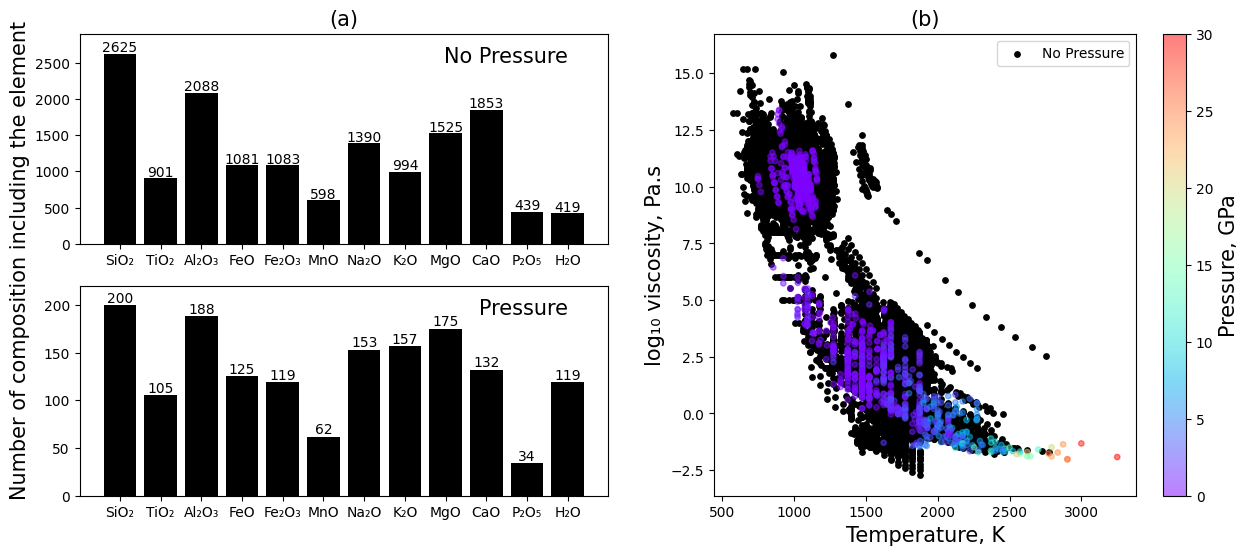

In [4]:
# loading the spreadsheets 
dataset_lp = pd.read_excel("./data/database.xlsx", sheet_name="lp")
dataset_hp = pd.read_excel("./data/database.xlsx", sheet_name="hp")

# Read database already differenciated by unique compositions
compolp = pd.read_excel('./data/database.xlsx',sheet_name='uniquelp')
compohp = pd.read_excel('./data/database.xlsx',sheet_name='uniquehp')

# Create empty dataframe with column names
lplist=[]
hplist=[]

# create a Boolean mask for the rows to hide
for i in ('s','t','a','f','f.1','m','n','k','m.1','c','p','h'):    #Looking for all elements
    masklp = compolp[i] == 0    #Create a mask to hide all non 100% data
    maskhp = compohp[i] == 0    #Create a mask to hide all non 100% data
    i_onlylp = compolp[~masklp]    #Looking for all elements    
    i_onlyhp = compohp[~maskhp]    #Looking for all elements
    lplist.append(i_onlylp.shape[0])    #Add to dataframe the system 
    hplist.append(i_onlyhp.shape[0])    #Add to dataframe the system 

print(lplist)
print(hplist)

# Create function to add values to barplots
def add_value_label(x_list, y_list):
    for i in range(1, len(x_list) + 1):
        plt.text(i, y_list[i - 1]+30, y_list[i - 1], ha='center')
def add_value_label2(x_list, y_list):
    for i in range(1, len(x_list) + 1):
        plt.text(i, y_list[i - 1]+3, y_list[i - 1], ha='center')
class_number = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] #['sio2','tio2','al2o3','feo','mno','na2o','k2o','mgo','cao','p2o5','h2o'])

# Create figures
fig=plt.figure(figsize=(15,6))

# Barplot 1 database without P
ax1=plt.subplot(2,2,1)
ax1.bar(class_number, lplist,color='black')
add_value_label(class_number, lplist)
ax1.set_xticks(class_number, ['SiO\u2082','TiO\u2082','Al\u2082O\u2083','FeO','Fe\u2082O\u2083','MnO','Na\u2082O','K\u2082O','MgO','CaO','P\u2082O\u2085','H\u2082O'])
ax1.set_ylim(0,2900)
ax1.text(12,2500,'No Pressure',size=15,ha='right')
ax1.set_title('(a)',size=15)

# Barplot 2 database with P
ax2=plt.subplot(2,2,3)
ax2.bar(class_number, hplist, color='black')
add_value_label2(class_number, hplist)
ax2.set_xticks(class_number, ['SiO\u2082','TiO\u2082','Al\u2082O\u2083','FeO','Fe\u2082O\u2083','MnO','Na\u2082O','K\u2082O','MgO','CaO','P\u2082O\u2085','H\u2082O'])
ax2.set_ylim(0,220)
ax2.text(12,190,'Pressure',size=15,ha='right')
ax2.text(-1.7,0,'Number of composition including the element',rotation='vertical',size=15)

# Diagram viscosity vs T, both databases
plt.subplot(1,2,2)
plt.scatter(dataset_lp['T'],dataset_lp['viscosity'],c='k',s=15)
plt.scatter(dataset_hp['T'],dataset_hp['viscosity'],cmap='rainbow',c=dataset_hp['P'],alpha=0.5,s=15)
plt.xlabel('Temperature, K',size=15)
plt.ylabel('log\u2081\u2080 viscosity, Pa.s',size=15)
cbar = plt.colorbar()
cbar.set_label('Pressure, GPa',size=15)
cbar.set_ticks([0,5,10,15,20,25,30], labels=['0','5','10','15','20','25','30'])
plt.legend(['No Pressure'])
plt.title('(b)',size=15)


plt.savefig('./figures/Figure1.pdf')

In [1]:
# x and y given as array_like objects
import plotly.express as px

# loading the spreadsheets 
dataset_lp = pd.read_excel("./data/database.xlsx", sheet_name="lp")
dataset_hp = pd.read_excel("./data/database.xlsx", sheet_name="hp")

fig = px.scatter(x=dataset_lp['T'],y=dataset_lp['viscosity'])
fig.show()

ModuleNotFoundError: No module named 'plotly'